In [1]:
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import h5py, os, sys, glob, datetime, time
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

plotting

In [11]:
def plot_hist( data, xlabel, ylabel, title, plotname='', legend=[], ylogscale=True ):
    fig = plt.figure( )
    plot_hist_on_axis( plt.gca(), data, xlabel, ylabel, title, legend, ylogscale )
    if legend:
        plt.legend()
    plt.tight_layout()
    #fig.savefig('fig/' + plotname + '_hist.png')
    plt.show()
    plt.close()


def plot_hist_on_axis( ax, data, xlabel, ylabel, title, legend=[], ylogscale=True ):
    bin_num = 70
    alpha = 0.85
    if ylogscale:
        ax.set_yscale('log', nonposy='clip')
    ax.hist( data, bins=bin_num, normed=True, alpha=alpha, histtype='stepfilled', label=legend )
    ax.set_ylabel( ylabel )
    ax.set_xlabel( xlabel )
    ax.set_title( title, fontsize=10 )
    ax.tick_params(axis='both', which='minor', labelsize=8)
    #ax.set_ylim(bottom=1e-7)

read A to HZ to ZZZ data

In [8]:
Mjj_selection = 1100.0

file_dir = '/afs/cern.ch/work/k/kiwoznia/vae_results/results_before_max_pixel/vae_built_model_results/AtoHZ_to_ZZZ_13TeV_PU40'

data = None
flist = glob(file_dir + '/' + '*result.h5')
labels = None
#print(flist)
for i_file, fname in enumerate(flist):
    f = h5py.File(fname, 'r')
    #print(f.keys())
    aux_evts = np.array(f.get('results'))
    aux_evts = aux_evts[aux_evts[:,0] > Mjj_selection]
    if data is None:
        labels = list(f.get('labels'))
        print('Labels:')
        print(labels)
        data = aux_evts
    else:
        data = np.append(data, aux_evts, axis=0)

print('read ', data.shape[0], ' events')

Labels:
['mJJ', 'j1Pt', 'j1Eta', 'j1Phi', 'j1M', 'j1E', 'j2Pt', 'j2M', 'j2E', 'DeltaEtaJJ', 'DeltaPhiJJ', 'j1TotalLoss', 'j1RecoLoss', 'j1KlLoss', 'j2TotalLoss', 'j2RecoLoss', 'j2KlLoss']
('read ', 63128, ' events')


In [9]:
# convert data to recarray
dt = [(str(s), '<f4') for s in labels]
data = np.array(list(zip(*data.T)), dtype=dt)
print(data.shape)

(63128,)


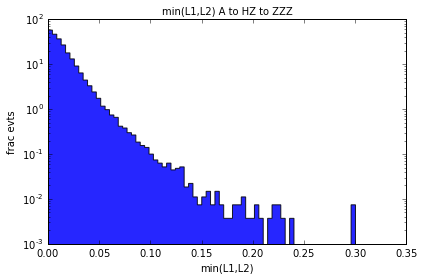

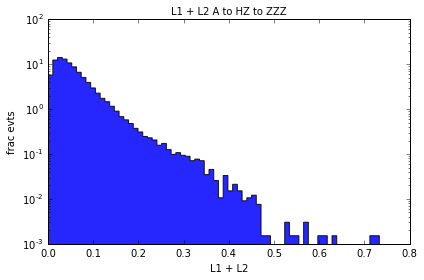

In [12]:
# plot loss 1D distribution
label = 'A to HZ to ZZZ'
n = 'A_to_HZ_to_ZZZ'
y = np.minimum(data['j1RecoLoss'],data['j2RecoLoss'])
plot_hist( y, 'min(L1,L2)', 'frac evts', 'min(L1,L2) '+label, n+'_min_j1j2_total_loss_loaded_vae' )
y = data['j1RecoLoss']+data['j2RecoLoss']
plot_hist( y, 'L1 + L2', 'frac evts', 'L1 + L2 '+label, n+'_sum_j1j2_reco_loss_loaded_vae' )